In [2]:
import pandas as pd 
import numpy as np
import healpy as hp
import ephem

In [3]:
#fp = pd.read_pickle('focalplane.pkl')

In [6]:
nside = 512
m = hp.ud_grade(hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/frequencymaps/HFI_SkyMap_143_2048_R3.01_full.fits", range(3), nest=True), nside, order_in="nest")
hp.write_map("input_map.fits", m, nest=True)

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_aux/lib/python3.7/site-packages/healpy-1.13.0-py3.7-linux-x86_64.egg/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


In [10]:
max(m[2])

0.0022065080047468655

In [4]:
m = hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/frequencymaps/HFI_SkyMap_143_2048_R3.01_full.fits", range(1), nest=True)
hp.write_map("input_map.fits", m, nest=True)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/global/common/software/cmb/cori/cmbenv-gcc_20200408/cmbenv_aux/lib/python3.6/site-packages/healpy-1.12.10-py3.6-linux-x86_64.egg/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [5]:
!rm input_map.fits


In [60]:
m = hp.read_map('input_map.fits', nest=False)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


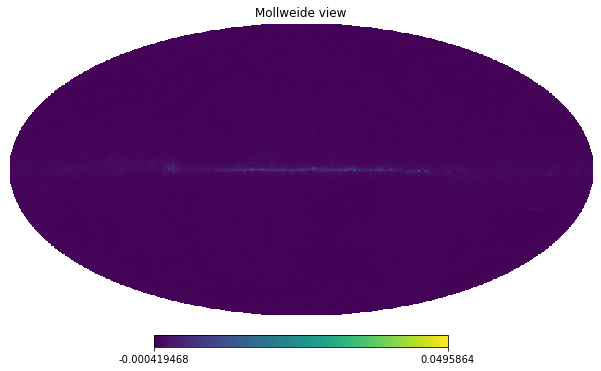

In [61]:
hp.mollview(m)

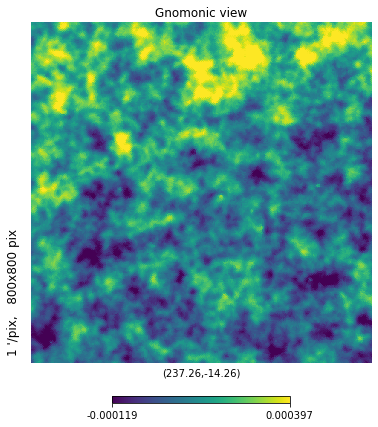

In [66]:
hp.gnomview(
    m,
    rot=(237.26,-14.26),
    xsize=800,
    reso=1.0,
    min = -0.000119,
    max = 0.000397
)

In [50]:
hp.gnomview?

Signature:
hp.gnomview(
    map=None,
    fig=None,
    rot=None,
    coord=None,
    unit='',
    xsize=200,
    ysize=None,
    reso=1.5,
    title='Gnomonic view',
    nest=False,
    remove_dip=False,
    remove_mono=False,
    gal_cut=0,
    min=None,
    max=None,
    flip='astro',
    format='%.3g',
    cbar=True,
    cmap=None,
    badcolor='gray',
    bgcolor='white',
    norm=None,
    hold=False,
    sub=None,
    margins=None,
    notext=False,
    return_projected_map=False,
    no_plot=False,
)
Docstring:
Plot a healpix map (given as an array) in Gnomonic projection.

Parameters
----------
map : array-like
  The map to project, supports masked maps, see the `ma` function.
  If None, use a blank map, useful for
  overplotting.
fig : None or int, optional
  A figure number. Default: None= create a new figure
rot : scalar or sequence, optional
  Describe the rotation to apply.
  In the form (lon, lat, psi) (unit: degrees) : the point at
  longitude *lon* and latitude *lat* w

In [37]:
OpPointingHpix?

Init signature:
OpPointingHpix(
    pixels='pixels',
    weights='weights',
    nside=64,
    nest=False,
    mode='I',
    cal=None,
    epsilon=None,
    common_flag_name=None,
    common_flag_mask=255,
    apply_flags=False,
    keep_quats=False,
    single_precision=False,
    nside_submap=16,
)
Docstring:     
Operator which generates I/Q/U healpix pointing weights.

Given the individual detector pointing, this computes the pointing weights
assuming that the detector is a linear polarizer followed by a total
power measurement.  An optional dictionary of calibration factors may
be specified.  Additional options include specifying a constant cross-polar
response (eps) and a rotating, perfect half-wave plate.  The timestream
model is then (see Jones, et al, 2006):

.. math::
    d = cal \left[\frac{(1+eps)}{2} I + \frac{(1-eps)}{2} \left[Q \cos{2a} + U \sin{2a}\right]\right]

Or, if a HWP is included in the response with time varying angle "w", then
the total response is:

.. math::
